<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 34s 0us/step 


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [4]:
import matplotlib.pyplot as plt

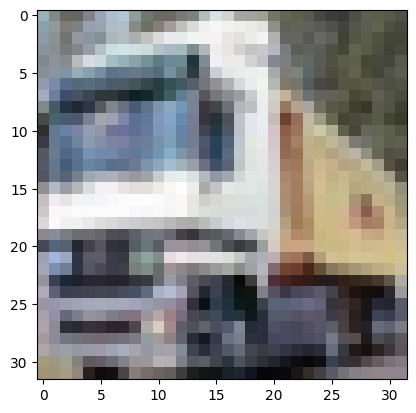

In [6]:
# FROG
plt.imshow(x_train[1])

In [11]:
print(y_train[89])

[4]


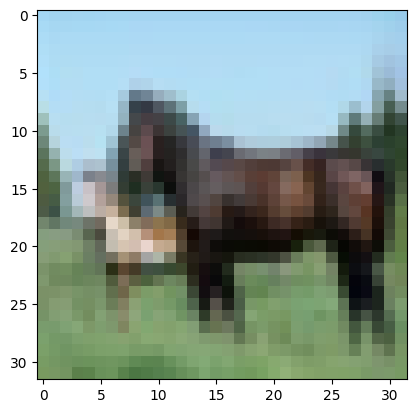

In [9]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [12]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [13]:
x_train[0].shape

(32, 32, 3)

In [14]:
x_train.max()

np.uint8(255)

In [15]:
x_train = x_train/225

In [16]:
x_test = x_test/255

In [17]:
x_train.shape

(50000, 32, 32, 3)

In [18]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [19]:
from tensorflow.keras.utils import to_categorical

In [26]:
y_train.shape

(50000, 1)

In [27]:
y_train[0]

array([6], dtype=uint8)

In [22]:
y_cat_train = to_categorical(y_train,10)

In [23]:
y_cat_train.shape

(50000, 10)

In [24]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [25]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [29]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

 
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

C:\Users\Admin\anaconda3\envs\mytfenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [33]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3656 - loss: 1.7492 - val_accuracy: 0.5383 - val_loss: 1.2778
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5816 - loss: 1.1918 - val_accuracy: 0.5923 - val_loss: 1.1494
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6451 - loss: 1.0199 - val_accuracy: 0.6386 - val_loss: 1.0302
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6919 - loss: 0.8911 - val_accuracy: 0.6469 - val_loss: 1.0165
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7251 - loss: 0.8033 - val_accuracy: 0.6707 - val_loss: 0.9570
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7536 - loss: 0.7208 - val_accuracy: 0.6452 - val_loss: 1.0519
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7723 - loss: 0.6632 - val_accuracy: 0.6615 - val_loss: 1.1276
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7951 - loss: 0.6039 -

In [34]:
# Careful, don't overwrite our file!
model.save('cifar_10epochs.keras')

In [35]:
losses = pd.DataFrame(model.history.history)

In [39]:
losses

,accuracy,loss,val_accuracy,val_loss
0,0.45054,1.528933,0.5383,1.277825
1,0.59282,1.160032,0.5923,1.149439
2,0.65026,1.002634,0.6386,1.030189
3,0.69166,0.895831,0.6469,1.016468
4,0.72256,0.808376,0.6707,0.956979
5,0.74672,0.738282,0.6452,1.051854
6,0.76716,0.679905,0.6615,1.127618
7,0.78896,0.623129,0.6648,1.099517


<Axes: >

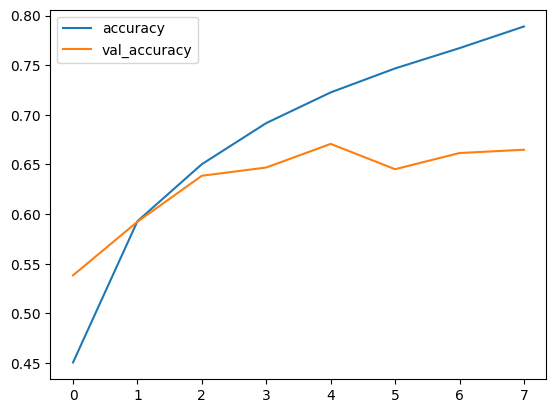

In [37]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

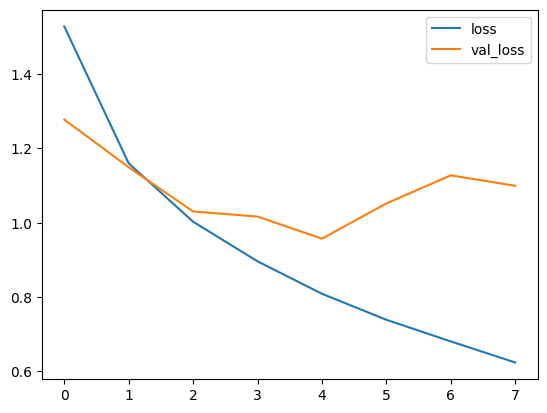

In [38]:
losses[['loss','val_loss']].plot()

In [40]:
model.metrics_names

['loss', 'compile_metrics']

In [41]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'compile_metrics']
[1.099516749382019, 0.6647999882698059]


In [44]:
from sklearn.metrics import classification_report,confusion_matrix

preds_prob = model.predict(x_test)
predictions = np.argmax(preds_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67      1000
           1       0.71      0.86      0.78      1000
           2       0.51      0.63      0.56      1000
           3       0.57      0.39      0.46      1000
           4       0.75      0.44      0.55      1000
           5       0.67      0.48      0.56      1000
           6       0.76      0.78      0.77      1000
           7       0.70      0.75      0.72      1000
           8       0.71      0.82      0.76      1000
           9       0.61      0.84      0.71      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [46]:
confusion_matrix(y_test,predictions)

array([[647,  58,  57,   5,  10,   4,   9,  14, 119,  77],
       [  9, 862,   5,   3,   1,   3,   4,   3,  26,  84],
       [ 74,  24, 633,  34,  37,  44,  52,  38,  24,  40],
       [ 43,  36, 129, 387,  31, 115,  74,  44,  49,  92],
       [ 41,  22, 184,  50, 436,  21,  59, 121,  32,  34],
       [ 28,  15, 115, 140,  20, 485,  29,  88,  27,  53],
       [ 21,  22,  55,  30,  17,  13, 782,  12,  22,  26],
       [ 15,  15,  47,  24,  28,  33,  11, 754,   7,  66],
       [ 36,  65,  12,   1,   2,   2,   2,   4, 818,  58],
       [  9,  97,  12,   2,   0,   1,   3,   6,  26, 844]])

<Axes: >

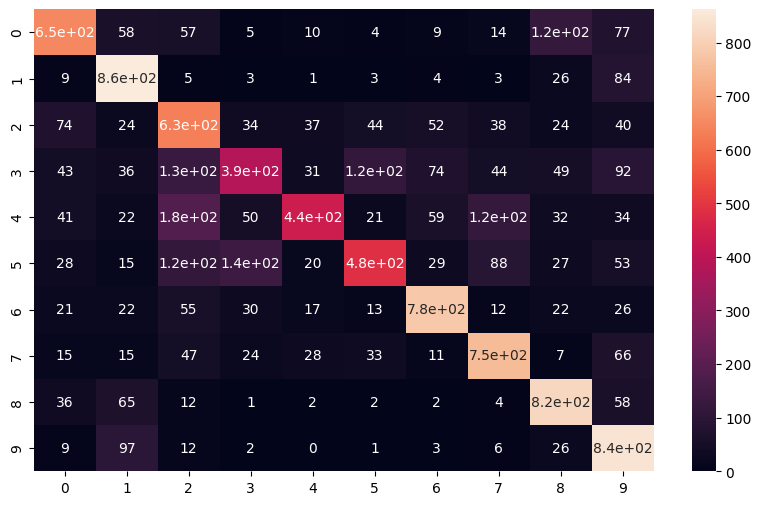

In [47]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [48]:
my_image = x_test[16]

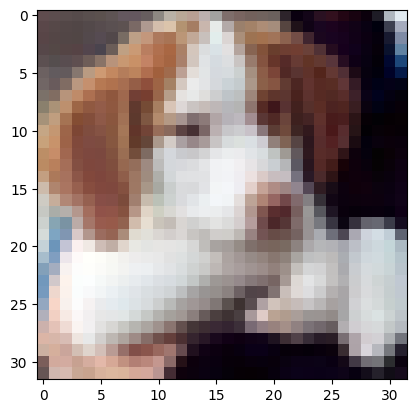

In [49]:
plt.imshow(my_image)

In [50]:
# SHAPE --> (num_images,width,height,color_channels)
preds_prob = model.predict(my_image.reshape(1,32,32,3))
predictions = np.argmax(preds_prob, axis=1);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [51]:
predictions

array([5])

In [ ]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html